# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [103]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('./Profissao- Cientista de Dados_M10_support material.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [7]:
df['data_ref'].min()

'2015-01-01'

In [8]:
df['data_ref'].max()

'2016-03-01'

In [121]:
df_qual = df[['data_ref', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil']]
df_qual

,data_ref,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil
0,2015-01-01,False,True,Assalariado,Secundário,Casado
1,2015-01-01,True,True,Empresário,Secundário,Casado
2,2015-01-01,True,True,Assalariado,Superior completo,Casado
3,2015-01-01,True,False,Empresário,Secundário,Casado
4,2015-01-01,False,False,Assalariado,Secundário,Casado
...,...,...,...,...,...,...
14995,2016-03-01,True,True,Assalariado,Secundário,Casado
14996,2016-03-01,True,True,Servidor público,Superior completo,Casado
14997,2016-03-01,True,True,Assalariado,Secundário,Casado
14998,2016-03-01,False,True,Servidor público,Superior completo,Casado


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [148]:
df1 = df_qual[['data_ref', 'posse_de_veiculo', 'posse_de_imovel']]

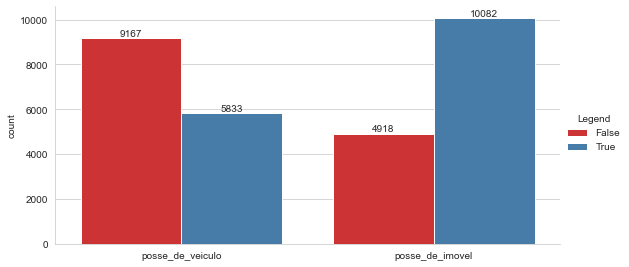

In [189]:
df_long = df.melt(value_vars=df_qual[['posse_de_veiculo', 'posse_de_imovel']], value_name='Legend').replace({'Legend': {0: 'No', 1: 'Yes'}})
sns.set_style('whitegrid')

g = sns.catplot(kind='count', data=df_long,
                x='variable', hue='Legend', palette='Set1', height=4, aspect=2)
g.set(xlabel='')
for ax in g.axes.flat:
    for bars in ax.containers:
        ax.bar_label(bars)
plt.show()

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

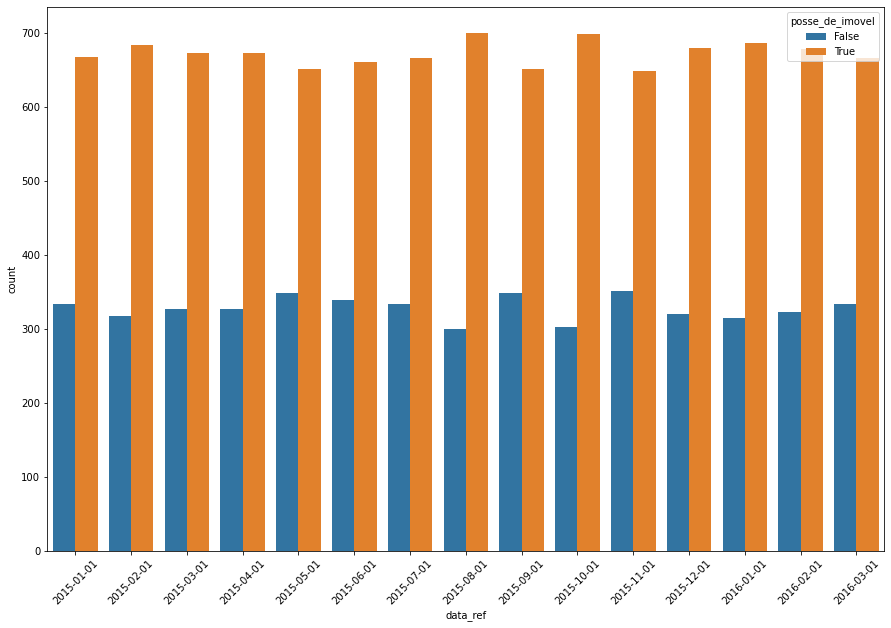

In [112]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
ax_imovel = sns.countplot(x='data_ref',  hue = 'posse_de_imovel', data=df)

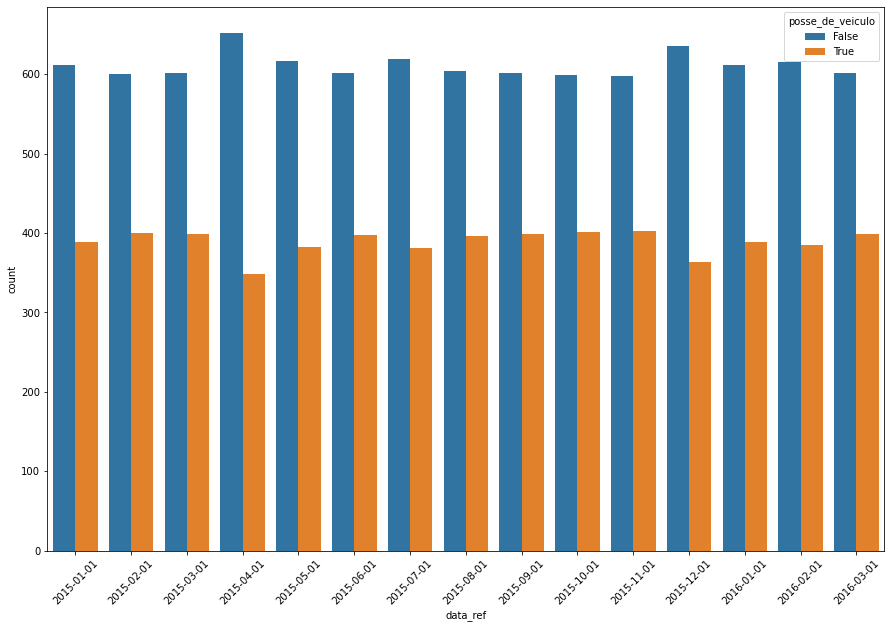

In [113]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
ax_veiculo = sns.countplot(x='data_ref',  hue = 'posse_de_veiculo', data=df)


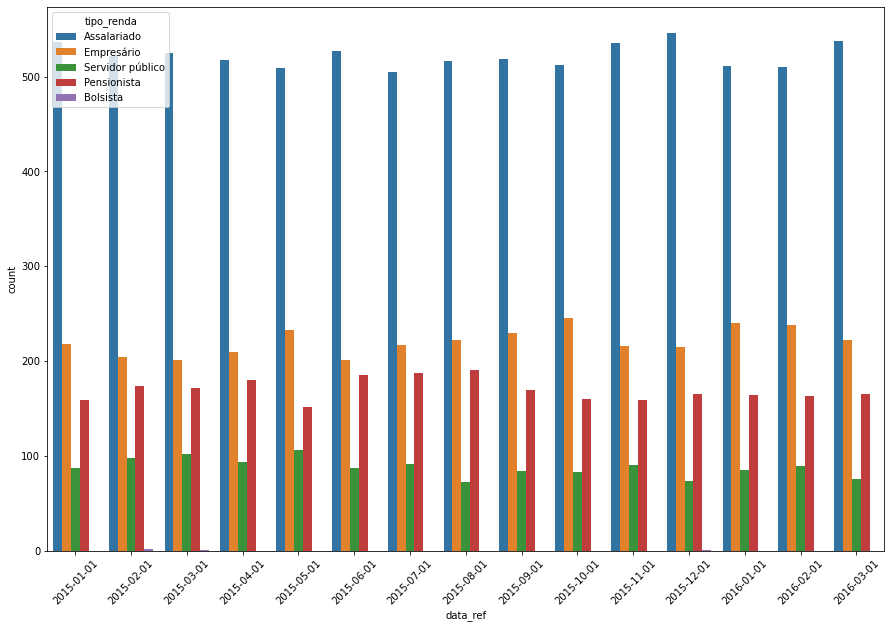

In [114]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
ax_tipo_renda = sns.countplot(x='data_ref',  hue = 'tipo_renda', data=df)


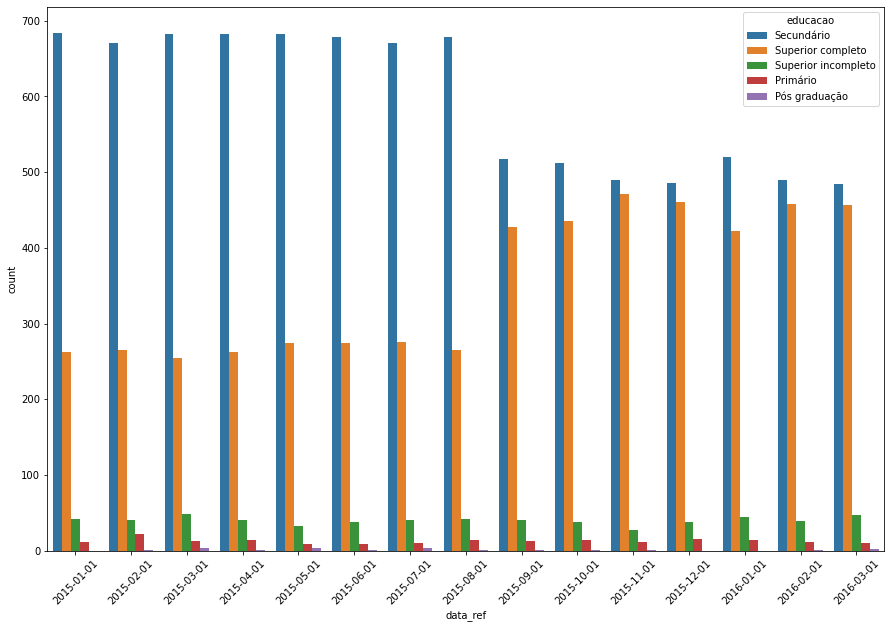

In [115]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
ax_educacao = sns.countplot(x='data_ref',  hue = 'educacao', data=df)


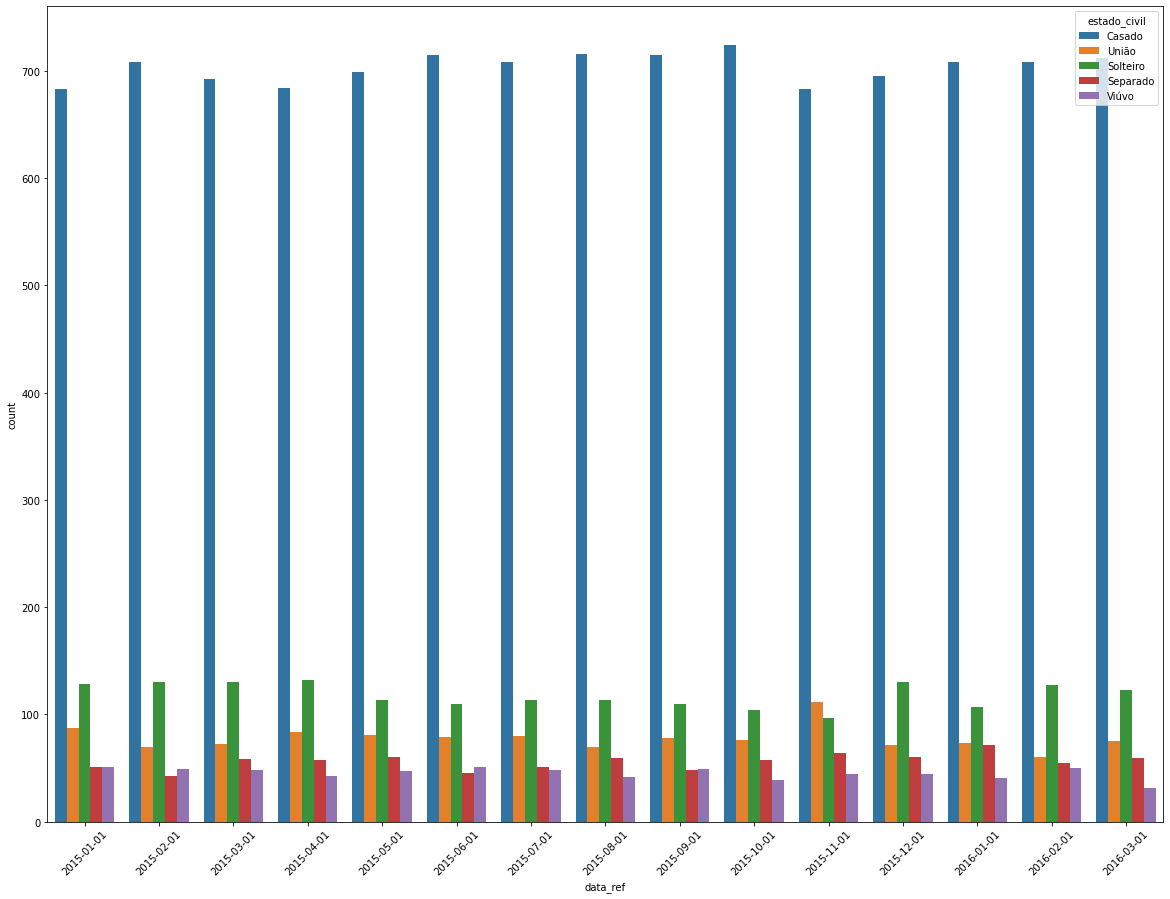

In [150]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
ax_estado_civil = sns.countplot(x='data_ref',  hue = 'estado_civil', data=df)

# Observações

* Pelo que pude observar a única variável que tem mudança significativa com o decorrer do tempo é o maior número de pessoas com Educação Superior Completo, e menor número de pessoas com Educação Secundária.
* 